Name:Anuya Thakur

UID: 209027

Roll No: 19

Subject: Machine Learning 1

# HEALTH CARE Domain
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

The dataset used is a dataset which will be able to detect people likely to get strokes on the basis of Gender, Age, Whether or not they have heart disease and hypertension, whether or not they are married, work type, residence type, Average Glucose Level, BMI, Smoking Status

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Government Job", "Neverworked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("E:\\Anuya MSc\\Sem 2\\EL + ML Project\\healthcare-dataset-stroke-data.csv",header=0)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.shape

(5110, 12)

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Conclusion
We have 201 missing values in bmi column. 
None of the other Columns have Missing values.

We will handle this later

In [7]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

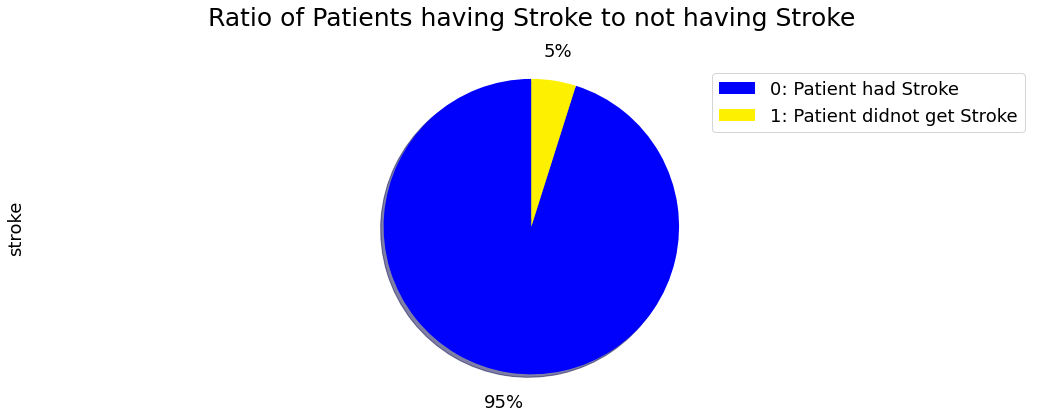

In [12]:
import matplotlib as mpl
colors_list = ['#0000fd','#fdf000']
mpl.rcParams['font.size'] = 18.0
ex = pd.DataFrame(df['stroke'].value_counts())
ex['stroke'].plot(kind='pie',
            figsize=(18, 6),
            autopct='%1.0f%%', 
            startangle=90,  
            shadow=True,       
            labels=None,    
            pctdistance=1.2, 
            colors=colors_list,
            )

plt.title('Ratio of Patients having Stroke to not having Stroke',y=1.1,fontsize=25) 
plt.axis('equal') 
plt.legend(labels=['0: Patient had Stroke','1: Patient didnot get Stroke'], loc='upper right') 
plt.show()

This Shows that the dataset is not balanced.

# Exploratory Data Analysis

## Analysis on Gender

In [9]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Here since we have only 1 value for Others as gender we check the entries for that column and delete it because that value will affect our analysis. We can consider it as Outlier.

In [10]:
df2=pd.DataFrame(columns=df.columns)
for i,data in df.iterrows():
    if data["gender"]=='Other':
        print(i,"\n",data)
        df2=df.drop(i)

3116 
 id                             56156
gender                         Other
age                               26
hypertension                       0
heart_disease                      0
ever_married                      No
work_type                    Private
Residence_type                 Rural
avg_glucose_level             143.33
bmi                             22.4
smoking_status       formerly smoked
stroke                             0
Name: 3116, dtype: object


Here we created another dataframe which doesnot contain the gender which is other and we named it as df2. We are doing all the further analysis on this dataframe.

In [8]:
df2['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [11]:
sex=df2[["gender","stroke"]].groupby(["gender"]).mean().sort_values(by="stroke", ascending=False)
sex

,stroke
gender,
Male,0.051064
Female,0.047094


<AxesSubplot:title={'center':'Genderwise chances of Stroke'}, xlabel='Gender', ylabel='Chances of Stroke'>

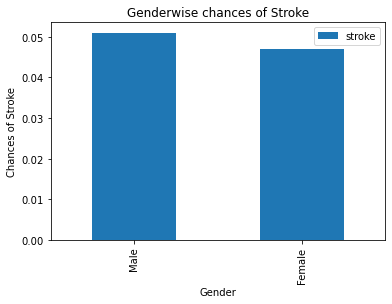

In [12]:
sex.plot(kind="bar",title="Genderwise chances of Stroke",xlabel="Gender",ylabel="Chances of Stroke")

#### Conclusion:
This Shows that the the Gender doesnot affect the Chances of Stroke to a major extent. But to say Males are 0.5% more likely to get Stroke than Females

## Analysis on Age

In [9]:
df2["age"].min()

0.08

In [10]:
df2["age"].max()

82.0

Here since we have a values in range of 0.08-82 we need to group them for further analysis

In [11]:
df2["Categorical_age"]=pd.cut(df2["age"],5) #Make age in 5 categories 
df2["Categorical_age"]

0         (65.616, 82.0]
1       (49.232, 65.616]
2         (65.616, 82.0]
3       (32.848, 49.232]
4         (65.616, 82.0]
              ...       
5105      (65.616, 82.0]
5106      (65.616, 82.0]
5107    (32.848, 49.232]
5108    (49.232, 65.616]
5109    (32.848, 49.232]
Name: Categorical_age, Length: 5109, dtype: category
Categories (5, interval[float64]): [(-0.00192, 16.464] < (16.464, 32.848] < (32.848, 49.232] < (49.232, 65.616] < (65.616, 82.0]]

In [12]:
df2["Categorical_age"].value_counts()

(49.232, 65.616]      1245
(32.848, 49.232]      1180
(65.616, 82.0]         965
(16.464, 32.848]       923
(-0.00192, 16.464]     796
Name: Categorical_age, dtype: int64

In [19]:
age=df2[["Categorical_age","stroke"]].groupby(["Categorical_age"]).mean().sort_values(by="stroke", ascending=False)
age

,stroke
Categorical_age,
"(65.616, 82.0]",0.161658
"(49.232, 65.616]",0.058635
"(32.848, 49.232]",0.014407
"(-0.00192, 16.464]",0.002513
"(16.464, 32.848]",0.001083


<AxesSubplot:title={'center':'Agewise chances of Stroke'}, xlabel='Range of Age', ylabel='Chances of Stroke'>

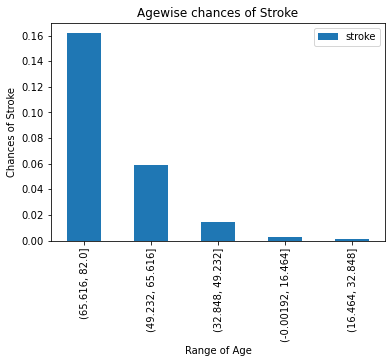

In [20]:
age.plot(kind="bar",title="Agewise chances of Stroke",xlabel="Range of Age",ylabel="Chances of Stroke")

#### Conclusion:
Chances of Stroke are more for higher age group 

People between age 65.6-82 are having more chances of having Stroke

#### Checking for Outliers

C:\Users\Anuya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

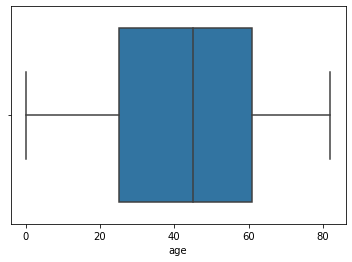

In [13]:
sns.boxplot(df2["age"])

We see no Outlier in Age Column. Thus further processing is not required here

## Analysis on Pre-existing Health Conditions

#### Analysis on Hypertension

In [21]:
df2["hypertension"].value_counts()

0    4611
1     498
Name: hypertension, dtype: int64

In [22]:
hyp=df2[["hypertension","stroke"]].groupby(["hypertension"]).mean().sort_values(by="stroke", ascending=False)
hyp

,stroke
hypertension,
1,0.132530
0,0.039688


<AxesSubplot:title={'center':'Chances of Stroke with Hypertension'}, xlabel='Hypertension\n 0:No Hypertension \n 1: Hypertension', ylabel='Chances of Stroke'>

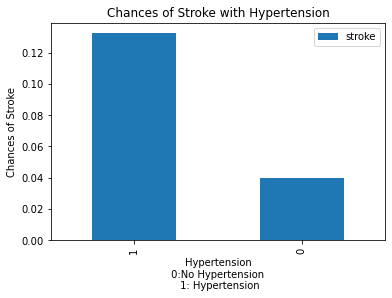

In [23]:
hyp.plot(kind="bar",title="Chances of Stroke with Hypertension",xlabel="Hypertension\n 0:No Hypertension \n 1: Hypertension",ylabel="Chances of Stroke")

#### Conclusion:
People with Hypertension have more Chances of getting stroke

#### Analysis on Heart Disease

In [12]:
df2["heart_disease"].value_counts()

0    4833
1     276
Name: heart_disease, dtype: int64

In [13]:
hd=df2[["heart_disease","stroke"]].groupby(["heart_disease"]).mean().sort_values(by="stroke", ascending=False)
hd

,stroke
heart_disease,
1,0.170290
0,0.041796


<AxesSubplot:title={'center':'Chances of Stroke with Heart Disease'}, xlabel='Heart Disease \n 0:No Heart Disease\n1:Heart disease', ylabel='Chances of Stroke'>

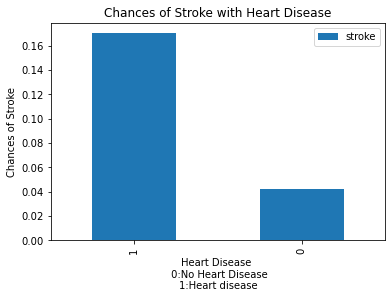

In [14]:
hd.plot(kind="bar",title="Chances of Stroke with Heart Disease",xlabel="Heart Disease \n 0:No Heart Disease\n1:Heart disease",ylabel="Chances of Stroke")

#### Conclusion:
People with Heart Disease have more chance of getting Stroke

#### Combined Analysis of Heart Disease and Hypertension

In [15]:
hyp_hd=df2[["heart_disease","hypertension","stroke"]].groupby(["heart_disease","hypertension"]).mean()
hyp_hd

stroke
heart_disease hypertension          
0             0             0.033871
              1             0.122120
1             0             0.160377
              1             0.203125

<AxesSubplot:title={'center':'Pre exsting Health condition vs Chances of Stroke'}, xlabel='(Heart Disease, Hypertension)'>

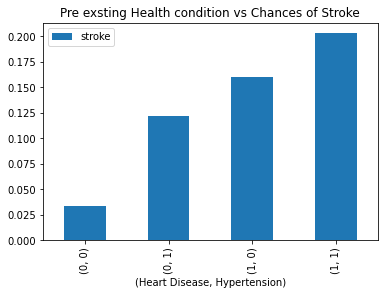

In [28]:
hyp_hd.plot(kind="bar", title="Pre exsting Health condition vs Chances of Stroke", xlabel="(Heart Disease, Hypertension)")

#### Conclusion:
The Chances of having stroke increases with both the health conditions, Heart Disease and Hyoertension

## Analysis on Maritial Status

In [29]:
df2["ever_married"].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [30]:
ms=df2[["ever_married","stroke"]].groupby(["ever_married"]).mean().sort_values(by="stroke", ascending=False)
ms

,stroke
ever_married,
Yes,0.065613
No,0.016515


<AxesSubplot:title={'center':'Chances of Stroke based on Marital Status'}, xlabel='Is the person married'>

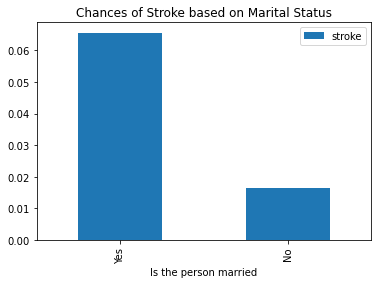

In [31]:
ms.plot(kind="bar", title="Chances of Stroke based on Marital Status", xlabel="Is the person married")

#### Conclusion:
The Chances of Stroke are increased if the person is married

#### Combined Analysis of Gender and Ever Married

In [32]:
em_sex=df2[["ever_married","gender","stroke"]].groupby(["gender","ever_married"]).mean().sort_values(by="stroke", ascending=False)
em_sex

stroke
gender ever_married          
Male   Yes           0.073964
Female Yes           0.059970
       No            0.021148
Male   No            0.010485

<AxesSubplot:title={'center':'Chances of Stroke based on Marital Status and Gender'}, xlabel='(Gender, Married)'>

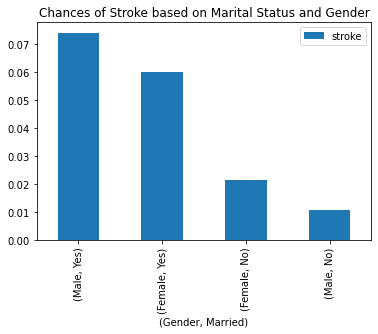

In [33]:
em_sex.plot(kind="bar", title="Chances of Stroke based on Marital Status and Gender", xlabel="(Gender, Married)")

#### Conclusion:
Married Males have more chances of getting Stroke followed by Married Females

### Analysis on Work Type

In [34]:
df2["work_type"].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [35]:
wt=df2[["work_type","stroke"]].groupby(["work_type"]).mean().sort_values(by="stroke", ascending=False)
wt

,stroke
work_type,
Self-employed,0.079365
Private,0.050958
Govt_job,0.050228
children,0.002911
Never_worked,0.000000


<AxesSubplot:title={'center':'Chances of Stroke based on Job Type'}, xlabel='Type of Job'>

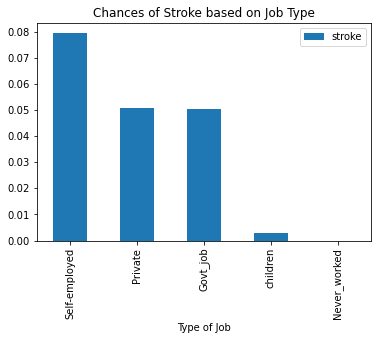

In [36]:
wt.plot(kind="bar", title="Chances of Stroke based on Job Type", xlabel="Type of Job")

#### Conclusion:
Self Employed people are more likely to get Stroke

Children and People who donot work are least likely to have Stroke

### Analysis on Residence Type

In [37]:
df2["Residence_type"].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [38]:
rt=df2[["Residence_type","stroke"]].groupby(["Residence_type"]).mean().sort_values(by="stroke", ascending=False)
rt

,stroke
Residence_type,
Urban,0.052003
Rural,0.045364


<AxesSubplot:title={'center':'Chances of Stroke based on Area'}, xlabel='Urban or Rural'>

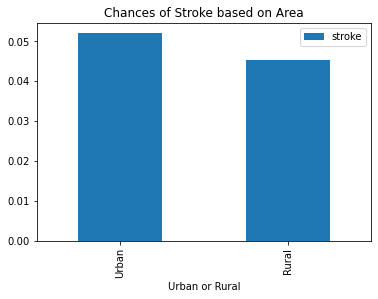

In [39]:
rt.plot(kind="bar", title="Chances of Stroke based on Area", xlabel="Urban or Rural")

#### Conclusion:
Area of Residence Urban or Rural doesnot have much effect on having Stroke

### Analysis on Smoking Status

In [40]:
df2["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [41]:
ss=df2[["smoking_status","stroke"]].groupby(["smoking_status"]).mean().sort_values(by="stroke", ascending=False)
ss

,stroke
smoking_status,
formerly smoked,0.079186
smokes,0.053232
never smoked,0.047569
Unknown,0.030440


<AxesSubplot:title={'center':'Chances of Stroke based on Smoking Status'}, xlabel='Smoking Status'>

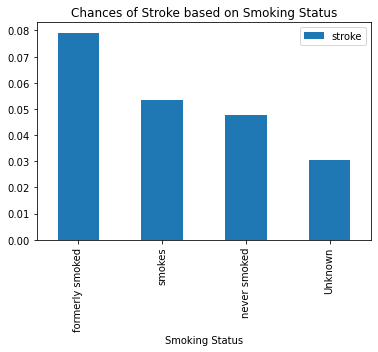

In [42]:
ss.plot(kind="bar", title="Chances of Stroke based on Smoking Status", xlabel="Smoking Status")

#### Conclusion:
Formerly Smoked people are more likely to have Stroke according to the data

### Analysis on Glucose Level

In [43]:
df2['avg_glucose_level'].min()

55.12

In [44]:
df2['avg_glucose_level'].max()

271.74

Since we have a range of values we combine them into groups for further analysis

In [70]:
df2["Glucose"]=pd.cut(df2['avg_glucose_level'],3) # Divide average glucose level in 3 categories 
df2["Glucose"]

0        (199.533, 271.74]
1        (199.533, 271.74]
2        (54.903, 127.327]
3       (127.327, 199.533]
4       (127.327, 199.533]
               ...        
5105     (54.903, 127.327]
5106     (54.903, 127.327]
5107     (54.903, 127.327]
5108    (127.327, 199.533]
5109     (54.903, 127.327]
Name: Glucose, Length: 5109, dtype: category
Categories (3, interval[float64]): [(54.903, 127.327] < (127.327, 199.533] < (199.533, 271.74]]

In [71]:
age=df2[["Glucose","stroke"]].groupby(["Glucose"]).mean().sort_values(by="stroke", ascending=False)
age

,stroke
Glucose,
"(199.533, 271.74]",0.131818
"(127.327, 199.533]",0.079922
"(54.903, 127.327]",0.036092


<AxesSubplot:title={'center':'Chances of Stroke based on Glucose Level'}, xlabel='Glucose Level'>

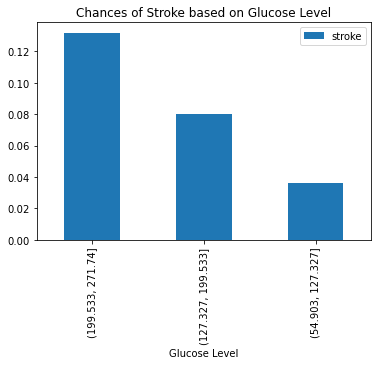

In [47]:
age.plot(kind="bar", title="Chances of Stroke based on Glucose Level", xlabel="Glucose Level")

#### Conclusion:
People with High Glucose Levels exceding 199 are more likely to have Stroke

#### Checking for Outliers

C:\Users\Anuya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

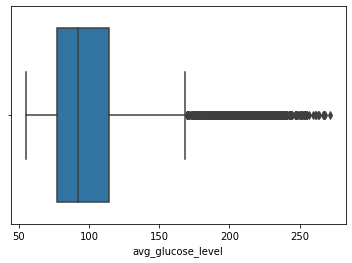

In [14]:
sns.boxplot(df2["avg_glucose_level"])

In [18]:
Q1=df2.avg_glucose_level.quantile(0.25)
Q3=df2.avg_glucose_level.quantile(0.75)
IQR=Q3-Q1
u=Q3+(3*IQR)
L=Q1-(3*IQR)
df3=df2[(df2["avg_glucose_level"]<L)|(df2["avg_glucose_level"]>u)]
print("Number of Outliers: ", df3.shape[0])

Number of Outliers:  165


Since the data has 165 Outliers we go ahead and do the processing on the outliers 

Here we are going to convert the Outlier values: Values below the Lower level are given the value of Lower level while that above Higher Level are given the value of Higher level.

In [23]:
for i,data in df2.iterrows():
    if data["avg_glucose_level"]<L:
        df2.at[i,"avg_glucose_level"]=L
    elif data["avg_glucose_level"]>u:
        df2.at[i,"avg_glucose_level"]=u

### Analysis on BMI

In [31]:
df2["bmi"].value_counts()

28.7    41
28.4    38
27.7    37
27.6    37
26.1    37
        ..
51.0     1
13.9     1
54.0     1
59.7     1
54.8     1
Name: bmi, Length: 411, dtype: int64

In [17]:
mv_bmi=df2["bmi"].isna().sum()
mv_bmi

201

In [22]:
df2.shape

(5109, 12)

In [24]:
d=(100*mv_bmi)/5109
print("{:.4f}".format(d),"% Missing Values")

3.9342 % Missing Values


Here since we have approximately 4% missing values we can fill the na values 

In [35]:
df2["bmi"].min()

10.3

In [36]:
df2["bmi"].max()

61.900000000000006

In [37]:
avg_bmi=df2['bmi'].mean()
avg_bmi

28.873451507742477

In [38]:
std_bmi=df2['bmi'].std()
std_bmi

7.731130525311327

The missing data is filled using random values between a range, the range being standard deviation below and above average bmi.
We are doing this because we donot want a rigid data so this range gives us different values for missing data.

In [39]:
for i,data in df2.iterrows():
    if pd.isnull(data["bmi"]):
        r=np.random.uniform(avg_bmi-std_bmi,avg_bmi+std_bmi)
        r=np.round(r,0)
        df2.at[i,"bmi"]=r
        print(i," ",df2.at[i,"bmi"])

1   26.0
8   36.0
13   35.0
19   22.0
27   26.0
29   26.0
43   25.0
46   27.0
50   22.0
51   24.0
54   31.0
57   33.0
64   26.0
70   31.0
78   29.0
81   26.0
84   29.0
105   36.0
112   35.0
124   25.0
126   27.0
129   21.0
133   24.0
146   25.0
150   34.0
160   28.0
161   22.0
162   25.0
167   29.0
170   33.0
171   24.0
174   23.0
178   28.0
183   33.0
189   25.0
198   25.0
200   23.0
218   25.0
227   22.0
247   30.0
342   28.0
360   31.0
432   27.0
477   22.0
479   37.0
522   36.0
668   22.0
671   35.0
680   30.0
729   36.0
742   35.0
865   26.0
867   30.0
872   36.0
879   29.0
903   36.0
936   24.0
965   35.0
1102   34.0
1106   35.0
1115   30.0
1183   28.0
1194   22.0
1214   30.0
1235   33.0
1241   28.0
1277   23.0
1293   28.0
1300   21.0
1306   33.0
1324   27.0
1342   27.0
1352   32.0
1427   33.0
1457   26.0
1466   25.0
1468   27.0
1471   31.0
1503   34.0
1528   23.0
1539   23.0
1546   33.0
1596   29.0
1640   24.0
1644   31.0
1646   31.0
1650   33.0
1669   33.0
1670   28.0
1681   23

Since BMI Values are in the range of 10.3-61.9 we group them for further analysis.

In [57]:
df2["Categorical_bmi"]=pd.cut(df2["bmi"],5) #
df2["Categorical_bmi"]

0        (27.76, 45.22]
1        (27.76, 45.22]
2        (27.76, 45.22]
3        (27.76, 45.22]
4       (10.213, 27.76]
             ...       
5105     (27.76, 45.22]
5106     (27.76, 45.22]
5107     (27.76, 45.22]
5108    (10.213, 27.76]
5109    (10.213, 27.76]
Name: Categorical_bmi, Length: 5109, dtype: category
Categories (5, interval[float64]): [(10.213, 27.76] < (27.76, 45.22] < (45.22, 62.68] < (62.68, 80.14] < (80.14, 97.6]]

In [58]:
bmi=df2[["Categorical_bmi","stroke"]].groupby(["Categorical_bmi"]).mean().sort_values(by="stroke", ascending=False)
bmi

,stroke
Categorical_bmi,
"(27.76, 45.22]",0.060606
"(45.22, 62.68]",0.049296
"(10.213, 27.76]",0.036720
"(62.68, 80.14]",0.000000
"(80.14, 97.6]",0.000000


<AxesSubplot:title={'center':'BMI vs Stroke'}, xlabel='Categories of BMI'>

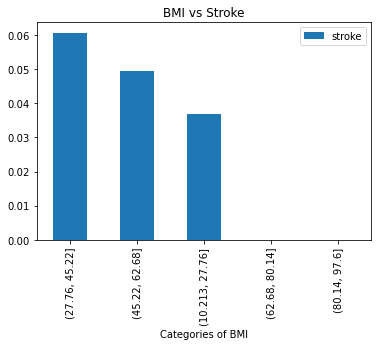

In [59]:
bmi.plot(kind="bar", title="BMI vs Stroke", xlabel="Categories of BMI")

#### Conclusion:
Patients with Lower BMI Values have higher chances of having Stroke.

#### Checking for Outliers

C:\Users\Anuya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

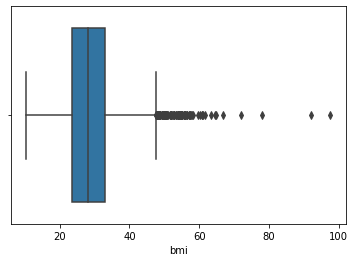

In [19]:
sns.boxplot(df2["bmi"])

In [20]:
Q1=df2.bmi.quantile(0.25)
Q3=df2.bmi.quantile(0.75)
IQR=Q3-Q1
u=Q3+(3*IQR)
L=Q1-(3*IQR)
df3=df2[(df2["bmi"]<L)|(df2["bmi"]>u)]
print("Number of Outliers: ", df3.shape[0])

Number of Outliers:  8


Since the data has 8 Outliers we go ahead and do the processing on the outliers 

Here we are going to convert the Outlier values: Values below the Lower level are given the value of Lower level while that above Higher Level are given the value of Higher level.

In [24]:
for i,data in df2.iterrows():
    if data["bmi"]<L:
        df2.at[i,"bmi"]=L
    elif data["bmi"]>u:
        df2.at[i,"bmi"]=u

Since the dataset contains a few Categorical Columns we have to do Encoding for further analysis and Prediction

### Encoding

In [60]:
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Categorical_age,Glucose,Categorical_bmi
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,"(65.616, 82.0]","(199.533, 271.74]","(27.76, 45.22]"
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.0,never smoked,1,"(49.232, 65.616]","(199.533, 271.74]","(27.76, 45.22]"
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,"(65.616, 82.0]","(54.903, 127.327]","(27.76, 45.22]"
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,"(32.848, 49.232]","(127.327, 199.533]","(27.76, 45.22]"
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,"(65.616, 82.0]","(127.327, 199.533]","(10.213, 27.76]"


In [25]:
df2["gender"]=df2["gender"].astype("category")
df2["gender_encode"]=df2["gender"].cat.codes
df2["ever_married"]=df2["ever_married"].astype("category")
df2["marrital_status_encode"]=df2['ever_married'].cat.codes
df2['work_type']=df2['work_type'].astype("category")
df2["Work_type_encode"]=df2['work_type'].cat.codes
df2['Residence_type']=df2['Residence_type'].astype("category")
df2["Residence_encode"]=df2['Residence_type'].cat.codes
df2['smoking_status']=df2['smoking_status'].astype("category")
df2["smoking_status_encode"]=df2['smoking_status'].cat.codes

In [40]:
df2.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'Categorical_age', 'gender_encode',
       'marrital_status_encode', 'Work_type_encode', 'Residence_encode',
       'smoking_status_encode'],
      dtype='object')

In [41]:
drop_elements=['id','gender','ever_married','work_type','Residence_type','smoking_status', 'Categorical_age', 'Glucose',
       'Categorical_bmi']
df_cleaned=df2.drop(drop_elements, axis=1)

Here I have dropped the Categorical Columns and not the actual ones for Age, Average glucose level and bmi as we will be standardizing them later while making the model

In [42]:
df_cleaned.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_encode,marrital_status_encode,Work_type_encode,Residence_encode,smoking_status_encode
0,61.9,0,1,228.69,36.6,1,1,1,2,1,1
1,61.0,0,0,202.21,26.0,1,0,1,3,0,2
2,61.9,0,1,105.92,32.5,1,1,1,2,0,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,61.9,1,0,174.12,24.0,1,0,1,3,0,2


We are going to save the data into a new CSV so that we donot need to run this whole thing again before doing the further analysis

In [43]:
df_cleaned.to_csv("E:\\Anuya MSC\\Sem 2\\EL + ML Project\\stroke_data_Cleaned3.csv") #Storing to new csv file

In [2]:
df3=pd.read_csv("E:\\Anuya MSC\\Sem 2\\EL + ML Project\\stroke_data_Cleaned3.csv",header=0)

In [4]:
df3.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_encode,marrital_status_encode,Work_type_encode,Residence_encode,smoking_status_encode
0,61.9,0,1,228.69,36.6,1,1,1,2,1,1
1,61.0,0,0,202.21,26.0,1,0,1,3,0,2
2,61.9,0,1,105.92,32.5,1,1,1,2,0,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,61.9,1,0,174.12,24.0,1,0,1,3,0,2


In [5]:
sum(n<0 for n in df3.values.flatten()) 

0

Here we check if we have negative values in the data since we dont have it we can continue without making any changes

In [7]:
cor=df3.corr()
cor

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_encode,marrital_status_encode,Work_type_encode,Residence_encode,smoking_status_encode
age,1.000000,0.261530,0.229447,0.229341,0.381081,0.210743,-0.028572,0.723497,-0.420549,0.009939,0.300798
hypertension,0.261530,1.000000,0.108292,0.174540,0.158880,0.127891,0.021223,0.164187,-0.051772,-0.007980,0.111018
heart_disease,0.229447,0.108292,1.000000,0.161907,0.035495,0.134905,0.085685,0.114601,-0.028031,0.003045,0.048445
avg_glucose_level,0.229341,0.174540,0.161907,1.000000,0.173005,0.131991,0.054722,0.155329,-0.050492,-0.004783,0.063498
bmi,0.381081,0.158880,0.035495,0.173005,1.000000,0.032975,-0.029684,0.339458,-0.302530,0.000127,0.225027
stroke,0.210743,0.127891,0.134905,0.131991,0.032975,1.000000,0.009081,0.108299,-0.032323,0.015415,0.028108
gender_encode,-0.028572,0.021223,0.085685,0.054722,-0.029684,0.009081,1.000000,-0.030171,0.056576,-0.006105,-0.062423
marrital_status_encode,0.723497,0.164187,0.114601,0.155329,0.339458,0.108299,-0.030171,1.000000,-0.352831,0.005988,0.259604
Work_type_encode,-0.420549,-0.051772,-0.028031,-0.050492,-0.302530,-0.032323,0.056576,-0.352831,1.000000,-0.007348,-0.305942
Residence_encode,0.009939,-0.007980,0.003045,-0.004783,0.000127,0.015415,-0.006105,0.005988,-0.007348,1.000000,0.008168


<AxesSubplot:>

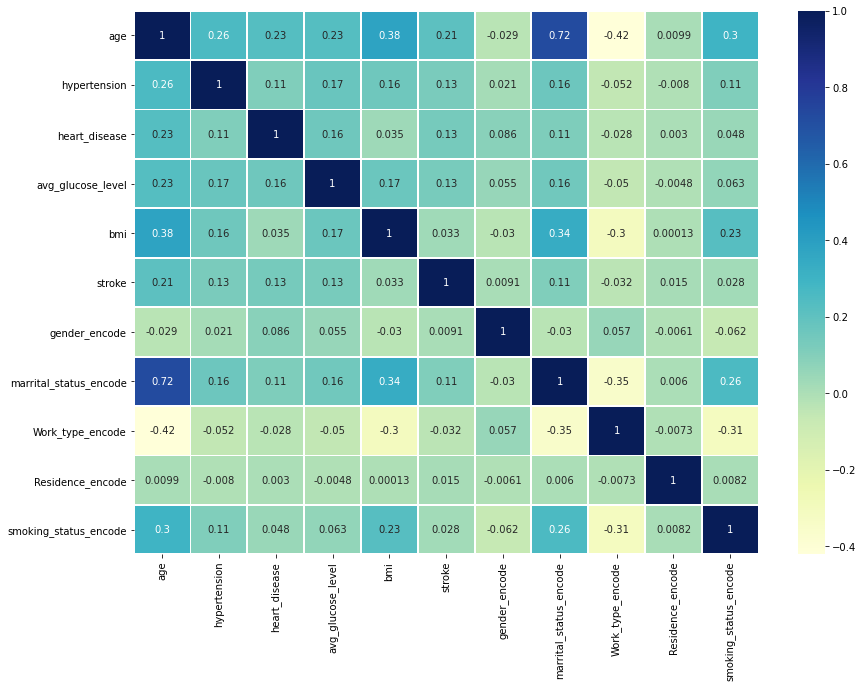

In [8]:
colormap=plt.cm.YlGnBu
plt.figure(figsize=(14,10))
sns.heatmap(df3.corr(),cmap=colormap, annot=True, linewidth=0.9)

The Correlation Matrix Shows that none of the attributes are highly correlated. So we donot need to remove any of them